# Supervised Learning - Part 1

Assume there is an unknown function $F^*$ that maps $X_n$'s to $Y$'s such that $Y=F^*(X)$. 

Let's call $F^*$ our *Target* function.

We generally can't hope to ever observe $F^*$ directly, but we have examples (or samples) of its inputs and its output.

![](./images/some_data_annotated.png)

The goal of a **Supervised Learning** algorithm is to find a good *Model* $\hat{F}$ of the unknown *Target* $F^*$ based on these examples.


## How do algorithms search for Models?


Algorithms **learn** from data by computing an *estimate* $\hat{F}$ from the data examples. This can be thought of as *fitting* a function to the data examples:

$\hat{F(X)} = \underset{\theta}{\operatorname{argmin}} L(Y,f(X;\theta))$


Where $L(Y,f(X;\theta))$ is a function that measures the error made by some function $f(X;\theta)$ in approximating $Y$. In other words, algorithms will try to find optimal values for a set of parameters $\theta$ such that the error in using $f$ evaluated at example inputs $X$ to approximate example outputs $Y$ is minimized. This process is called **Training** a model and the examples used to train the model are called the **Training Set**. 

There are many options of error measure $L$. The choice of $L$ depends on the type of problem (or type of Task) and the choice of algorithm. $L$ is called the **Loss** function, and it's also sometimes called the **Energy** or **Cost** function. We'll come back to this subject later in the workshop.

Different algorithms will focus on different classes of function $f$ with a different number of parameters $\theta$ to approximate $Y$.

Here is a visual representation of these ideas.

## Imagine a space inhabited by functions...

![](./images/model_space.gif)

$\hat{F_1 (x)}$ and $\hat{F_2 (x)}$ are a models of $F^*(x)$. Both are close to the real thing, but are still not exactly it. There is an idea of **error**.

Different algorithms will be most effective at finding models within different parts of this space. Some algorithms are more restrictive and are ONLY able to search in very limited parts of the space.

![](./images/function_space.png)

**DISCLAIMER**: This diagram is merely illustrative and does not reflect the real overlaps and boundaries of different classes of functions.


Here is how you can see these ideas in practice:



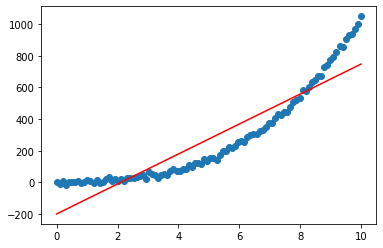

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

f = lambda x: (x**3 + 4*x + 2) + np.random.normal(0,10) 

f(4)

dataset = [(x,f(x)) for x in np.linspace(0,10,100)]

X,Y = zip(*dataset) 

X = np.array(X).reshape(-1,1) # Scikit-learn needs this to work with only one input/feature

plt.scatter(X,Y)

# IS LINEAR REGRESSION USEFUL ON THIS DATASET?

model = LinearRegression()

model.fit(X,Y)

Y_hat = model.predict(X)

plt.plot(X, Y_hat, color='r')


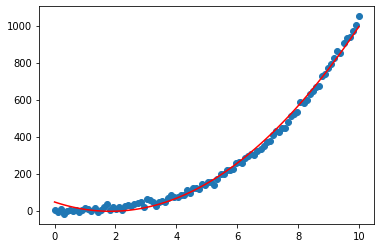

In [60]:
# LET'S TRY WITH POLYNOMIAL BASIS EXPANSIONS

from sklearn.preprocessing import PolynomialFeatures

plt.scatter(X,Y)

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)  #TRANSFORM X INTO X^n

model.fit(X_poly,Y)

plt.plot(X, model.predict(X_poly), color='r')


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


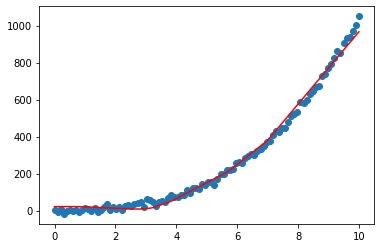

In [61]:
# NOW LET'S TRY A NEURAL NETWORK

from sklearn.neural_network import MLPRegressor

plt.scatter(X,Y)

model = MLPRegressor(hidden_layer_sizes=(100,50,10), max_iter=1000) #NEURAL NETWORKS ARE FLEXIBLE, TRY DIFFERENT NUMBERS OF LAYERS AND NEURONS...

model.fit(X,Y)

Y_hat = model.predict(X)

plt.plot(X, Y_hat, color='r')



## How do you know if your Model is any good?

In the first example above, the model was obviously bad... 

In the second, the model looks close!

In the third example you have to try different parameters, but you can get close too!

But does that mean these models are good approximations of the real $F^*$ ? In the first two examples we know they are not. But we don't often know the shape of $F^*$ in real life.

What we did above was, borrowing from statistical jargon, training a model by minimizing the error on *in-sample* data... but what we are actually interested in is how our model performs on *out-of-sample* data! We care about predicting $Y$ in the population!

Here's what our models looks like when we extend the range of the plot to show points outside of the sample we used to train:


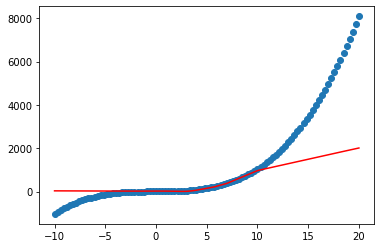

In [62]:
new_X = np.linspace(-10,20,100).reshape(-1,1)

new_Y = f(new_X)

#new_X_poly = poly.fit_transform(new_X)

plt.scatter(new_X,new_Y)

plt.plot(new_X, model.predict(new_X), color='r')



In general, the in-sample error, or **Training Error**, is not a very good measure of how well the model will do on out-of-sample data. In fact, models can have an arbitrarily small **Training Error** and be very bad at predicting out-of-sample values. To see this, consider what would happen if you were to interpolate the points from the example above using a very wiggly function.

So in practice you will need to have not one, but TWO datasets. One to train your model on and another to validate it. This second dataset is called a **Test Set** and it is a collection of inputs and outputs you obtained from the same source as your training data, but that you **did not use to train your model.**

It is the error in this dataset, called the **Test Error** that matters when we talk about the quality of our predictions, and hence the quality of our model.

Concretely, you will train your model on the **Training Set**, looking to minimize the **Training Error**. Then you will pick up the model you trained and plug in the inputs from your **Test Set**. You will then use the outputs you get from your model and compare them to the outputs in your **Test Set**. This will allow you to compute your **Test Error**.

Rinse and repeat until you're statisfied with the performance of your model on the **Test Set**!

A common rule-of-thumb is to break your initial data set in two chunks: about 80% of all examples go into your **Training Set**, the remaining 20% are set aside for your **Test Set**.

Another popular approach is to break your initial data set in THREE chunks: a **Training Set**, a **Validation Set** and a **Test Set**, where the **Validation Set** is not used directly to train the model, but the error in this set is used as the yardstick to *fine-tune* a model, so it participates indirectly in the training.


Let's look into some examples with real datasets to see how this works:


## Real Example 1: Flower Species Classification

In the toy examples we've seen above, we used a mathematical function to generate points and used different algorithms to try and approximate it. In that case, both our input X and output Y were quantitative (a real number representing a quantity). In Machine Learning this type of task, i.e. predicting a quantitative output, is called **Regression**.

Now let's look at an example where the output is no longer quantitative, but *categorical*, meaning that the output variable represents categories of things - a task called **Classification**.

We will use a popular Python Machine Learning library called **scikit-learn** to show how it works in practice.

### The Iris dataset

This example uses a classic dataset called the "Iris" dataset. It contains a number of measurements of differnt species of Iris flowers along with a label indicating which of 3 species of Iris the measurements came from.

We will train a model to take in measurements as inputs and predict the species.

Let's take a look at the data:

In [57]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

headers = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

iris_dataset = read_csv('./data/iris.csv', names = headers)

In [ ]:
print(iris_dataset.describe()) # A GOOD FIRST STEP IS TO COMPUTE SUMMARY STATISTICS

In [ ]:
print(iris_dataset) # THEN LOOK AT THE ACTUAL DATA

In [ ]:
print(iris_dataset.groupby('species').size()) # ARE THERE IMBALANCES IN THE OUTPUT CATEGORIES?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120cab710>,
      dtype=object)

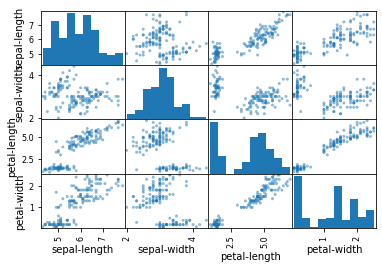

In [58]:
scatter_matrix(iris_dataset) # PLOT ALL VARIABLES 2 BY 2... ARE THERE ANY VISIBLE PATTERNS?

In [53]:
# LET'S CREATE A TRAINING SET AND A TEST SET

X = iris_dataset.values[:,0:4]
Y = iris_dataset.values[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

This model got 93.33333333333333 % of predictions right.


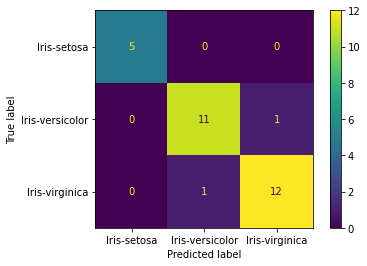

In [55]:
# NOW LET'S TRY DIFFERENT ALGORITHMS - FIRST A LINEAR MODEL: LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')

lr_model.fit(X_train, Y_train)

Y_hat = lr_model.predict(X_test)

plot_confusion_matrix(lr_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


This model got 93.33333333333333 % of predictions right.


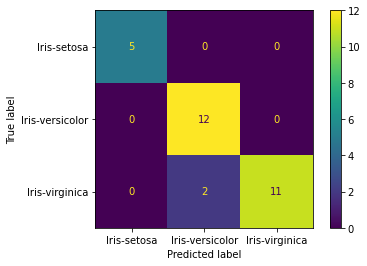

In [56]:
# ANOTHER MODEL: TREE CLASSIFIERS

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, Y_train)

Y_hat = tree_model.predict(X_test)

plot_confusion_matrix(tree_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


This model got 96.66666666666667 % of predictions right.


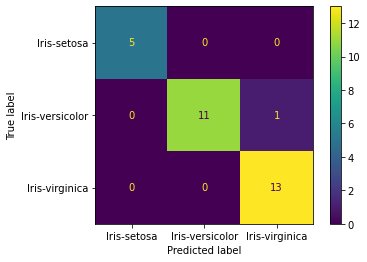

In [54]:
# ONE MORE: SUPPORT VECTOR MACHINES (SVM)

from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear')

svm_model.fit(X_train, Y_train)

Y_hat = svm_model.predict(X_test)

plot_confusion_matrix(svm_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


## Exercise 1: Wine Classification

Now it's your turn. This next dataset contains a number of measurements done in a chemical analysis of 3 different types of wine.

You will train a Support Vector Machine model to predict the type of wine based on the measurements. Use the example above as inspiration.

This model got 94.44444444444444 % of predictions right


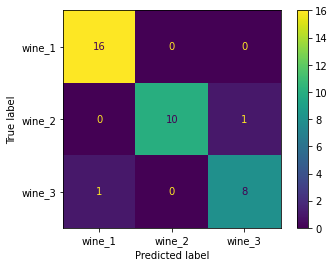

In [51]:
from pandas import read_csv
from sklearn.svm import SVC

headers = ['wine_type','alcohol', 'malic_acid','ash','alcalinity_of_ash','magnesium',
           'total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280_OD315','proline']

wine_dataset = ####('./data/wine.csv', names = ####)


## Real Example 2: Image Classification

In the Flower Species Classification we had a dataset with numerical features/inputs and a categorical response/output. The categories in our example appeared as text, but the code transformed them into numbers under the hood. What other types of data can be encoded as numbers?

The answer is: pretty much anything can. 

Let's look at a Classification problem using images. We will train a model to classify images as either Apples or Oranges:

This is how the computer 'see' the image: 

[[[255 253 255]
  [255 253 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]] 

This is how we see it:


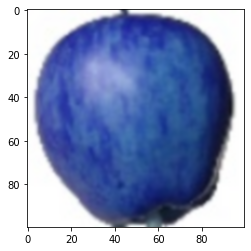

In [8]:
import numpy as np
import os
import cv2 
import matplotlib.pyplot as plt

an_apple = cv2.imread('./Fruit-Images-Dataset/Training/apples/0_100.jpg')

plt.imshow(an_apple, interpolation = 'bicubic')

print("This is how the computer 'sees' the image: \n")

print(an_apple, "\n")

print("This is how we see it:")


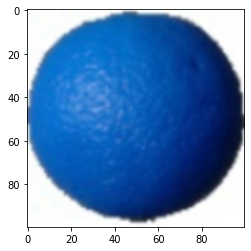

In [20]:
a_banana = cv2.imread('./Fruit-Images-Dataset/Training/oranges/0_100.jpg')

plt.imshow(a_banana, interpolation = 'bicubic')

In [29]:
# LET'S CREATE OUR TRAINING SET

apples_dir = './Fruit-Images-Dataset/Training/apples/'
oranges_dir = './Fruit-Images-Dataset/Training/oranges/'

apples = [ (cv2.imread(apples_dir + img).flatten()/255,"apple") for img in os.listdir(apples_dir) ]

oranges = [ (cv2.imread(oranges_dir + img).flatten()/255,"orange") for img in os.listdir(oranges_dir) ]

X_train,Y_train = zip(*(apples + oranges))

X_train = np.stack(X_train)


In [23]:
# AND THE TEST SET

apples_dir = './Fruit-Images-Dataset/Test/apples/'
oranges_dir = './Fruit-Images-Dataset/Test/oranges/'

apples = [ (cv2.imread(apples_dir + img).flatten()/255,"apple") for img in os.listdir(apples_dir) ]

oranges = [ (cv2.imread(oranges_dir + img).flatten()/255,"orange") for img in os.listdir(oranges_dir) ]

X_test,Y_test = zip(*(apples + oranges))

X_test = np.stack(X_test)


This model got 100.0 % of predictions right


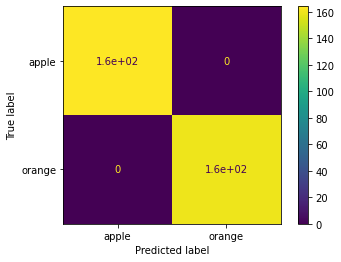

In [24]:
# THEN TRAIN A LOGISTIC REGRESSION MODEL AND SEE HOW IT DOES

lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')

lr_model.fit(X_train, Y_train)

Y_hat = lr_model.predict(X_test)

plot_confusion_matrix(lr_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")


## Exercise 2: Handwritten Digit Classification

Your turn again. This next dataset is another classic: the MNIST dataset of handwritten digits.

In this exercise, you will train a model of your choice on images of handwritten numbers that sometimes look alike when people write them: 0, 6 and 8.

Use all the examples we've seen so far as insipration.

In [73]:
# START BY CREATING YOUR TRAINING SET...

zero_dir = './MNIST-Dataset/Training/0/'
six_dir = './MNIST-Dataset/Training/6/'
eight_dir = './MNIST-Dataset/Training/8/'


X_train,Y_train = ####

In [73]:
# ...AND YOUR TEST SET

zero_dir = './MNIST-Dataset/Test/0/'
six_dir = './MNIST-Dataset/Test/6/'
eight_dir = './MNIST-Dataset/Test/8/'

X_test, Y_test = ####

This model got 98.48901098901099 % of predictions right.


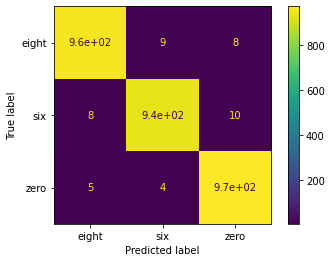

In [74]:
# TRAIN YOUR MODEL AND EVALUATE ITS PERFORMANCE ON THE TEST SET

my_model = ####

Y_hat = my_model(####)

plot_confusion_matrix(my_model,X_test, Y_test)

print("This model got", accuracy_score(Y_test, Y_hat)*100, "% of predictions right.")

## Summarizing what we've seen so far

Based on what we've covered so far, a Machine Learning program will generally have the following elements:

1. A class of functions $f(x;\theta)$ that the algorithm will use to try and approximate the taget $F^*$. 

    a. $f(x;\theta)$ can be a restrictive class of functions such as linear functions ($\beta_0 + \sum{\beta_i X_i}$) or a very flexible one, such as Neural Networks (we will see what they look like on the next notebook)
    
2. A Training Set: a dataset containing examples of inputs and outputs of interest.  

3. A Test Set: another dataset with examples of inputs and outputs that are not used to train the model.

4. A measure of the error in using $f(x;\theta)$ to approximate $F^*$, called the Loss function $L(Y,f(X;\theta))$. $L$ is used to train the model on the training set (see point 5) and can be used to measure performance on the Test Set. 

5. A way of solving the optimization problem: $\hat{F(X)} = \underset{\theta}{\operatorname{argmin}} L(Y,f(X;\theta))$

In the **scikit-learn** examples above, you will notice that 4, 5 and certain aspects of 1 are done mostly under the hood, leaving very little control up to you.

Next we turn to a more modern Machine Learning library that is better suited for high performance and solving difficult problems: **PyTorch**.
